<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic:** R Lang

**Title:** Data Analysis on R (with ggplot2)

**Author:** Luiz Barboza

**Date:** 20/dec/22

**Lang:** R

**Site:** https://quant-research.group/

**Email:** contato@quant-research.group

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("readr")
library(readr)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
grades<-read_csv("https://raw.githubusercontent.com/lcbjrrr/data/main/grades%20-%20okk.csv")
print(grades)

Rows: 12 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Course, Student, Score
dbl (4): AP1, AP2, AP3, Grade

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 12 × 7
   Course Student   AP1   AP2   AP3 Grade Score
   <chr>  <chr>   <dbl> <dbl> <dbl> <dbl> <chr>
 1 ADM    João      9     8     9     8.6 B    
 2 ADM    Maria     6     4    10     6   D    
 3 LAW    José      4     3     4     3.6 F    
 4 LAW    Pedro     8    10     7     8.6 B    
 5 ECO    Paulo     7.5   8     9.5   8.1 B    
 6 LAW    Esther    6     4.5   6     5.4 D    
 7 ADM    Gabriel   8     6     8     7.2 B    
 8 LAW    Rafael    7.5  10     9.5   8.9 B    
 9 ECO    Davi      6    10     7     7.8 B    
10 LAW    Silvio   10     9.5   9.5   9.7 A    
11 ADM    Sofia     8     7     6     7.2 B    
12 ADM    Raquel    4.5   4     4     4.2 F    


In [3]:
filter(grades, Grade>7)

Course,Student,AP1,AP2,AP3,Grade,Score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ADM,João,9.0,8.0,9.0,8.6,B
LAW,Pedro,8.0,10.0,7.0,8.6,B
ECO,Paulo,7.5,8.0,9.5,8.1,B
ADM,Gabriel,8.0,6.0,8.0,7.2,B
LAW,Rafael,7.5,10.0,9.5,8.9,B
ECO,Davi,6.0,10.0,7.0,7.8,B
LAW,Silvio,10.0,9.5,9.5,9.7,A
ADM,Sofia,8.0,7.0,6.0,7.2,B


In [4]:
select(grades,Student)

Student
<chr>
João
Maria
José
Pedro
Paulo
Esther
Gabriel
Rafael
Davi


In [5]:
select(filter(grades, Grade>7),Student)

Student
<chr>
João
Pedro
Paulo
Gabriel
Rafael
Davi
Silvio
Sofia


In [6]:
grades %>% filter( Grade>7) %>% select(Student)

Student
<chr>
João
Pedro
Paulo
Gabriel
Rafael
Davi
Silvio
Sofia


In [7]:
approved_students <- grades %>% filter( Grade>7) %>% select(Student)
approved_students

Student
<chr>
João
Pedro
Paulo
Gabriel
Rafael
Davi
Silvio
Sofia


In [8]:
avg_per_course <- grades %>% group_by(Course) %>% summarize(avg = mean(Grade))
avg_per_course

Course,avg
<chr>,<dbl>
ADM,6.64
ECO,7.95
LAW,7.24


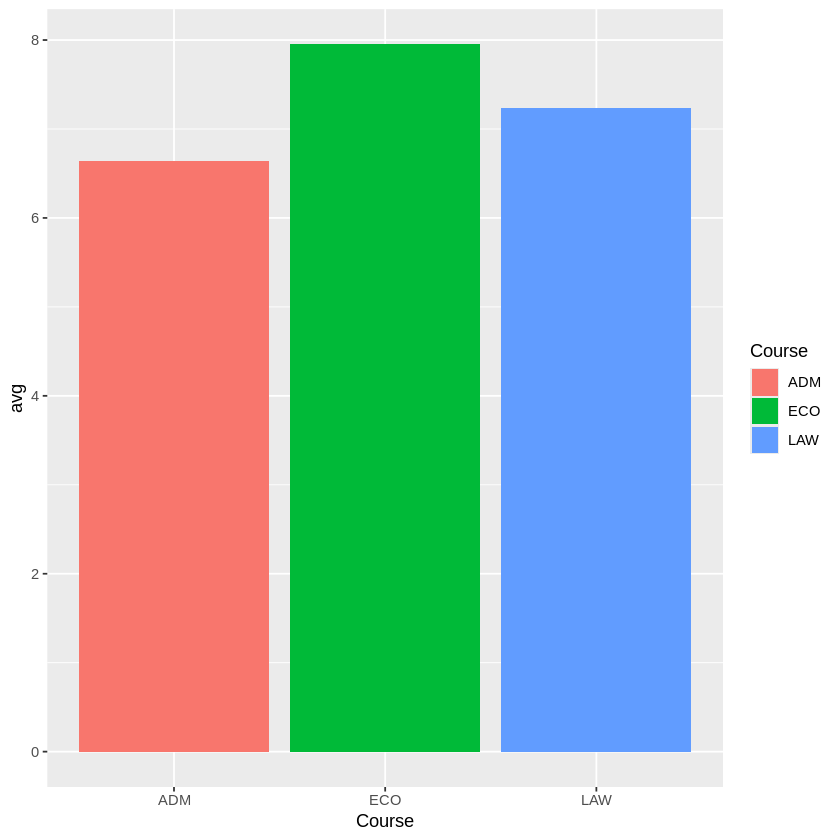

In [9]:
ggplot(data=avg_per_course,aes(x=Course,y=avg,fill=Course)) + geom_bar(stat='identity')

In [10]:
utilities <- read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/utilities%20-%20ok.csv')
utilities

Rows: 12 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (5): water, energy, telco, mng, supply

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


month,water,energy,telco,mng,supply
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
jan,50,450,154.5,980,1340.00
feb,55,425,138.0,980,2450.00
mar,60,400,120.0,980,1789.75
apr,65,375,43.0,980,2133.33
may,70,350,154.5,980,1340.00
jun,75,325,138.0,980,2450.00
jul,80,300,120.0,980,1789.75
aug,85,275,43.0,980,2133.33
sep,90,250,154.5,980,1340.00


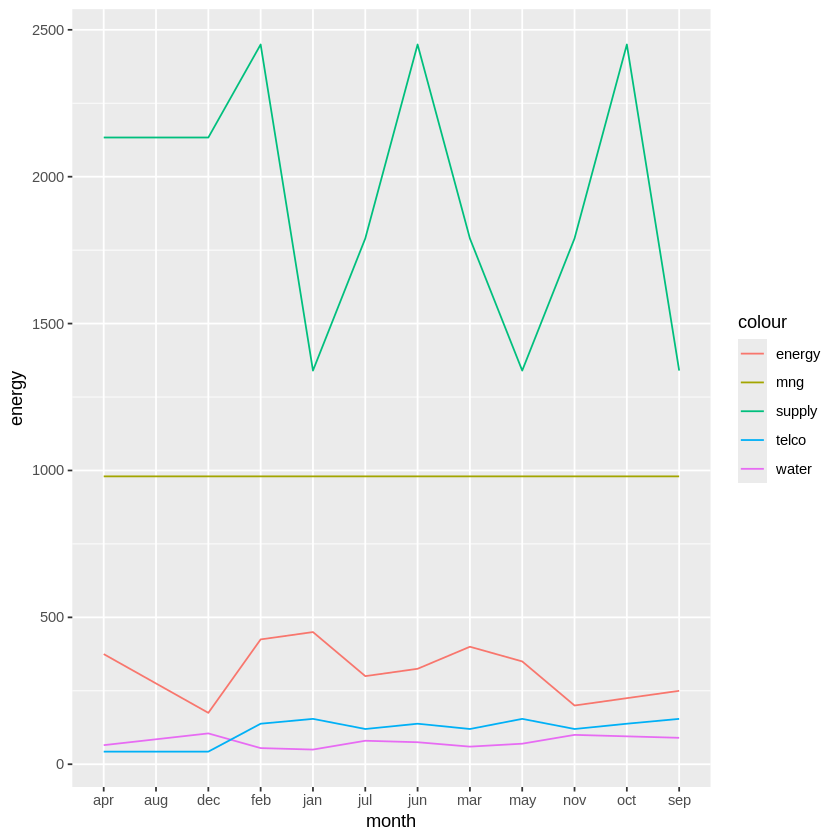

In [11]:
ggplot(data=utilities,aes(x=month, group = 1) ) +
  geom_line(aes(y=energy,color='energy')) +
  geom_line(aes(y=water,color='water')) +
  geom_line(aes(y=telco,color='telco')) +
  geom_line(aes(y=mng,color='mng')) +
  geom_line(aes(y=supply,color='supply'))

In [12]:
util_melt <- read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/utilities%20-%20melt.csv')
util_melt

Rows: 60 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): category, month
dbl (1): values

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


category,month,values
<chr>,<chr>,<dbl>
water,jan,50.00
water,feb,55.00
water,mar,60.00
water,apr,65.00
water,may,70.00
water,jun,75.00
water,jul,80.00
water,aug,85.00
water,sep,90.00


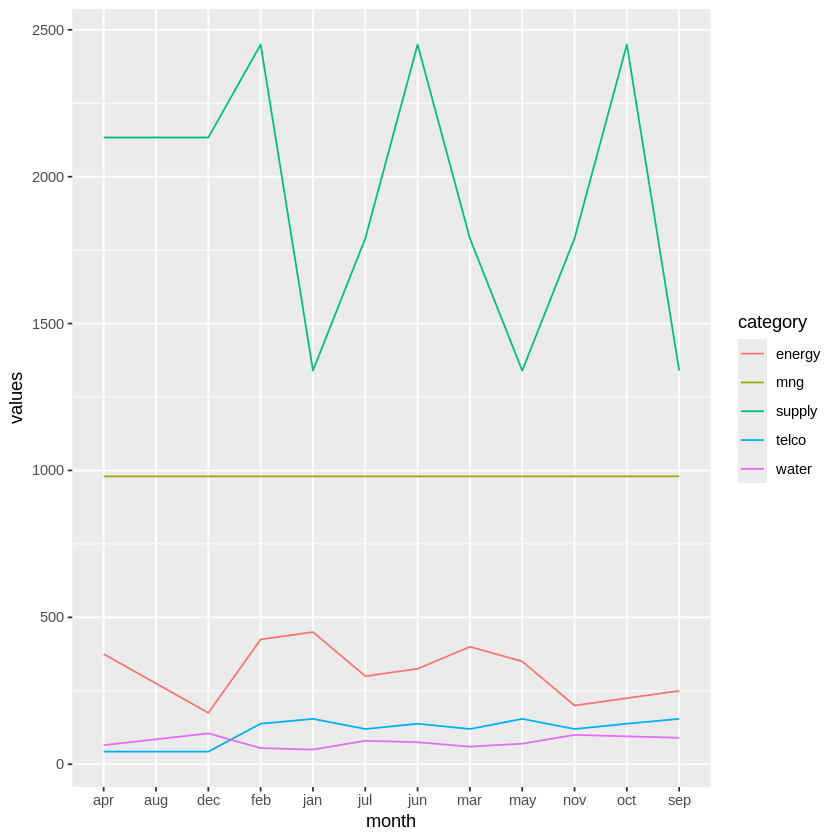

In [13]:
ggplot(data=util_melt,aes(x=month, y=values, group=category, color = category) ) +
  geom_line()

In [16]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
utility_m <- utilities %>% melt(id="month", value.name="values")
head(utility_m,6)

,month,variable,values
,<chr>,<fct>,<dbl>
1,jan,water,50
2,feb,water,55
3,mar,water,60
4,apr,water,65
5,may,water,70
6,jun,water,75


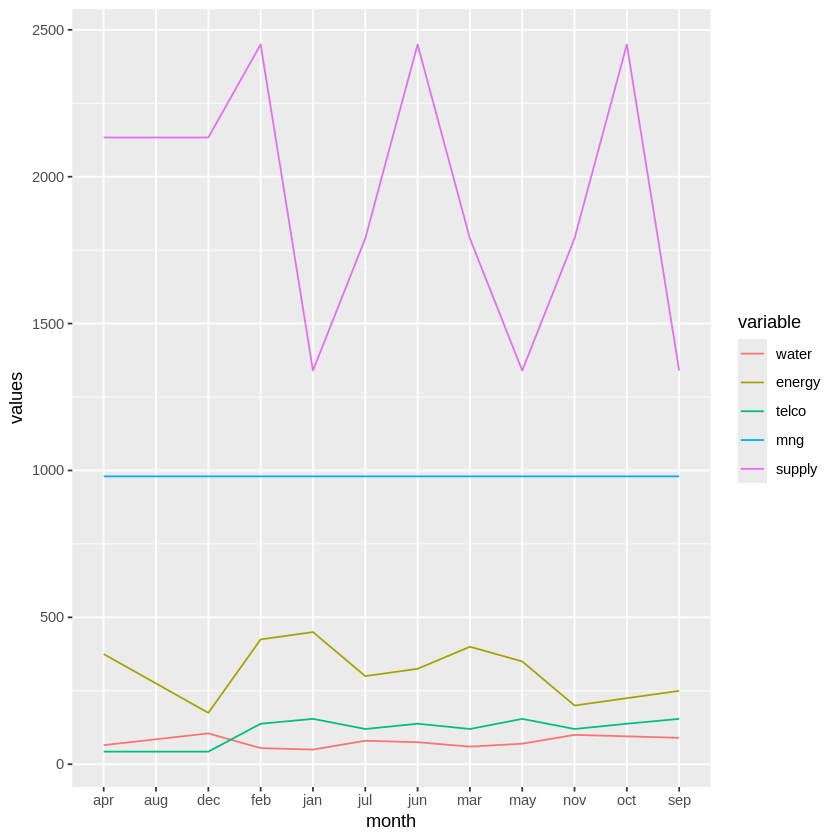

In [18]:
ggplot(data=utility_m,aes(x=month, y=values, group=variable, color = variable) ) +
  geom_line()

In [19]:
students_per_course <- grades %>% group_by(Course) %>% summarize(qty = NROW(Course))
students_per_course

Course,qty
<chr>,<int>
ADM,5
ECO,2
LAW,5


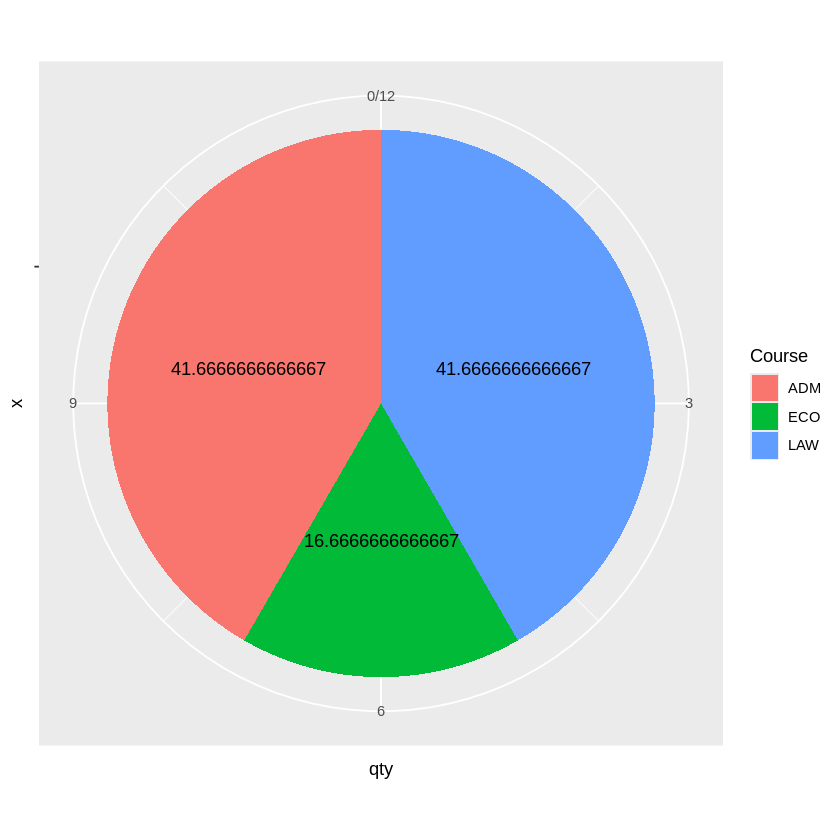

In [20]:
ggplot(data=students_per_course,aes(x="",y=qty,fill=Course)) +
  geom_bar(stat='identity') +
  coord_polar("y") +
  geom_text(aes(label = qty/sum(qty)*100),position=position_stack(vjust = 0.5) )